In [1]:
##1) Delivery_time -> Predict delivery time using sorting time 

In [57]:
#For loading dataset 
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#load data set

In [3]:
d_t=pd.read_csv('delivery_time.csv')

In [4]:
d_t

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
d_t.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [44]:
d_t.columns=("dt","st") 

In [7]:
d_t.columns

Index(['dt', 'st'], dtype='object')

In [8]:
d_t.isna().sum()

dt    0
st    0
dtype: int64

In [9]:
d_t.size

42

In [10]:
d_t.shape

(21, 2)

Text(0, 0.5, 'Sorting time')

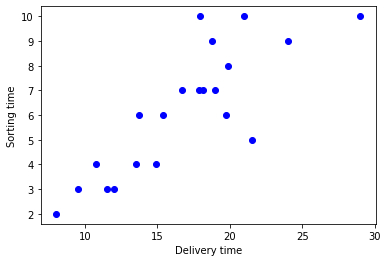

In [11]:
plt.plot(d_t.dt,d_t.st,"bo");plt.xlabel("Delivery time");plt.ylabel("Sorting time")

Here my scatter plot says that the data is positively correlated

In [12]:
d_t.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


It is telling that strength of the correlation between my variables and how strong they are correlated,here i have r=0.82,here i can say that strongly positively correlated

In [13]:
d_t.describe()

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='dt'>

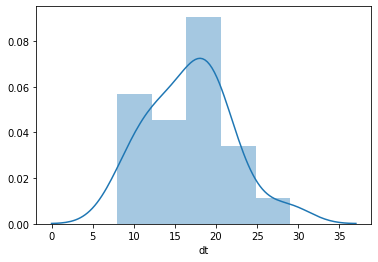

In [14]:
sns.distplot(d_t['dt'])

<AxesSubplot:xlabel='st'>

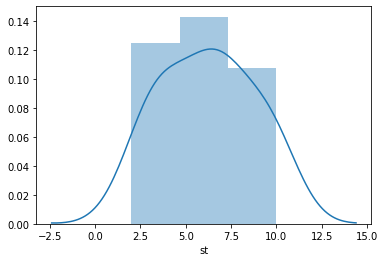

In [15]:
sns.distplot(d_t['st'])

In [47]:
import statsmodels.formula.api as smf
model=smf.ols("dt~st",data=d_t).fit()

In [48]:
model

<AxesSubplot:xlabel='st', ylabel='dt'>

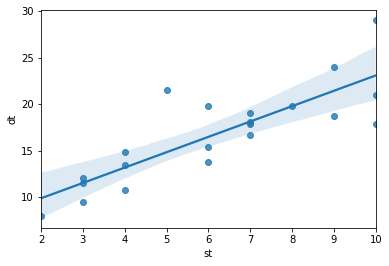

In [49]:
sns.regplot(x="st",y="dt",data=d_t)

In [42]:
# For getting coefficients of the varibles used in equation
model.params

Intercept    6.582734
st           1.649020
dtype: float64

Hence P valuve is very low which means that the there is strong correlation between these coeeficients and target dt

R^2 Value is 0.682 

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           3.98e-06
Time:                        22:58:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-values for the variables and R-squared value for prepared model

 Hence P valuve is very low which means that the there is strong correlation between these coeeficients and target(dt)

 R^2 Value is 0.682 

In [51]:
print (model.conf_int(0.05))

                  0          1
Intercept  2.979134  10.186334
st         1.108673   2.189367


In [23]:
#Predicted values of dt  using the model


In [24]:
pred = model.predict(pd.DataFrame(d_t['st']))
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'deliver time')

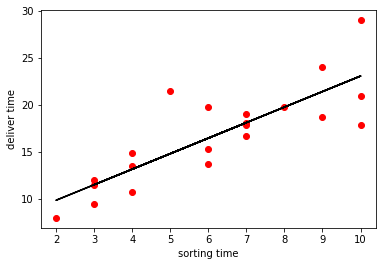

In [25]:
plt.scatter(x=d_t['st'],y=d_t['dt'],color='red');
plt.plot(d_t['st'],pred,color='black');
plt.xlabel('sorting time');plt.ylabel('deliver time')

In [26]:
# Transforming variables for accuracy

In [58]:
model2 = smf.ols('dt~np.log(st)',data=d_t).fit();
model2.params;
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           2.64e-06
Time:                        23:18:30   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
pred2 = model2.predict(pd.DataFrame(d_t['st'])) #Predicted values of dt  using the model
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'deliver time')

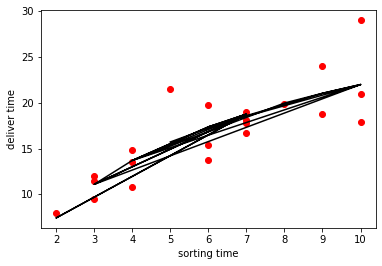

In [75]:
plt.scatter(x=d_t['st'],y=d_t['dt'],color='red');
plt.plot(d_t['st'],pred2,color='black');
plt.xlabel('sorting time');plt.ylabel('deliver time')


# Exponential transformation

In [76]:
model3 = smf.ols('np.log(dt)~(st)',data=d_t).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           1.59e-06
Time:                        23:26:32   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
pred_log = model3.predict(pd.DataFrame(d_t['st']))
pred_log
pred3=np.exp(pred_log) 

In [89]:
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

Text(0, 0.5, 'deliver time')

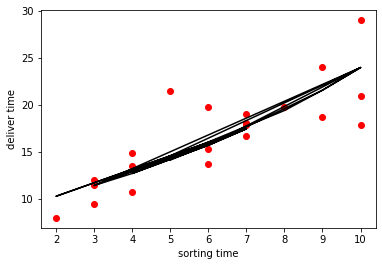

In [90]:
plt.scatter(x=d_t['st'],y=d_t['dt'],color='red');
plt.plot(d_t['st'],pred3,color='black');
plt.xlabel('sorting time');plt.ylabel('deliver time')

# Transforming variables for accuracy

In [80]:
model4 = smf.ols('np.log(st)~np.log(dt)',data=d_t).fit()
model4.params
model4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(st)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           1.60e-07
Time:                        23:27:11   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(dt)     1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
pred4 = model4.predict(pd.DataFrame(d_t['dt']))
pred4

0     2.077042
1     1.506074
2     1.997737
3     2.249601
4     2.494153
5     1.672035
6     1.947707
7     1.051972
8     1.870638
9     1.930591
10    2.002961
11    1.211715
12    1.779416
13    1.298868
14    1.357093
15    1.631849
16    1.529786
17    1.885711
18    0.829895
19    1.865575
20    2.107450
dtype: float64

Text(0, 0.5, 'd time')

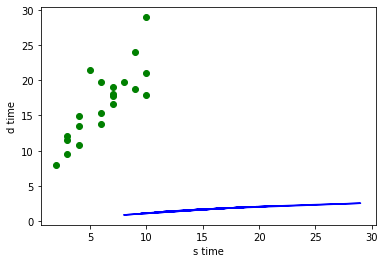

In [113]:
plt.scatter(x=d_t['st'],y=d_t['dt'],color='green');plt.plot(d_t['dt'],pred4,color='blue');plt.xlabel('s time');plt.ylabel('d time')


so we will consider the model having highest R-Squared value which is the log transformation - model4

In [98]:
student_resid = model4.resid_pearson 
student_resid

array([ 0.98412712, -0.52264329, -0.89875528, -0.22853792, -0.83588239,
        0.52240148, -0.0078409 ,  0.20350678,  1.88474367,  1.1634222 ,
        0.33371394,  0.76175291,  0.72647384, -0.87378879, -1.12784706,
       -1.07144476,  1.14308631,  0.26267218, -0.59668216,  0.35053288,
       -2.17301076])

Text(0, 0.5, 'Standardized Residual')

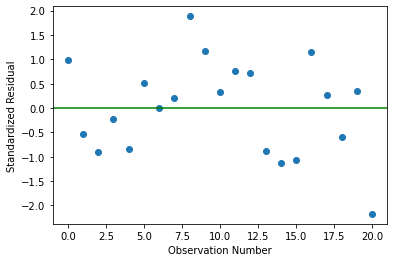

In [100]:
plt.plot(model4.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

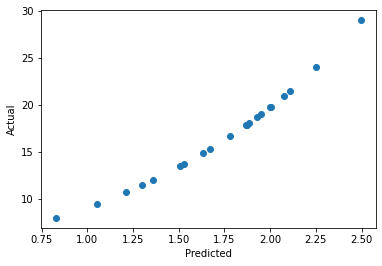

In [101]:
plt.scatter(x=pred4,y=d_t.dt);plt.xlabel("Predicted");plt.ylabel("Actual")

# so we will consider the model having highest R-Squared value which is the log transformation - model4